In [52]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import heapq


In [53]:
# file = 'maze.png'
file = 'KD_Mazes_ST_v1-16.jpg'



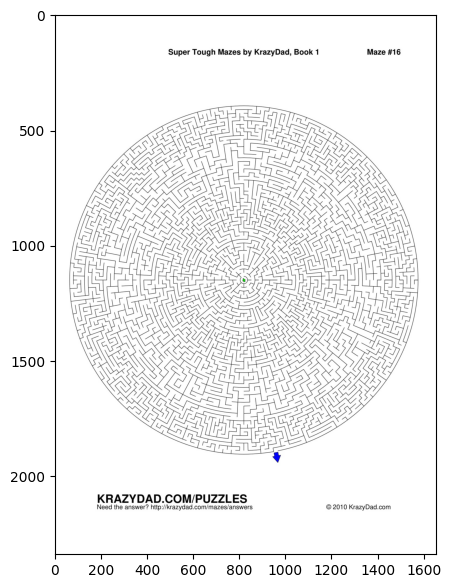

In [54]:
img = cv2.imread(file) # read an image from a file using
# cv2.circle(img,(5,220), 3, (255,0,0), -1) # add a circle at (5, 220)
# cv2.circle(img, (25,5), 3, (0,0,255), -1) # add a circle at (5,5)
plt.figure(figsize=(7,7))
plt.imshow(img) # show the image
img = cv2.imread(file)
plt.show()

In [55]:
img = img[:,:,0]

In [56]:
# Your Code Should Be Here
def find_neighboring_pixels(row,column):
    n , m = img.shape
    neighbor = []
    offset = [(0,-1),(0,1),(-1,0),(1,0)]
    for i,j in offset:
        if 0 < row+i < n and 0 < column + j < m:
            if img[row+i, column + j] > 200:
                neighbor.append((row+i,column+j))
    return neighbor
    


def dijkstra(source,destination):
    distances = {}
    parent = {}
    visited = set()
    heap = []
    heapq.heappush(heap,(0,(source)))
    
    distances[source] = 0
    
    while destination not in visited:
        d, node = heapq.heappop(heap)
        while node in visited:
            heapq.heappop(heap)

        visited.add(node)

        neighbor = find_neighboring_pixels(*node)
        for i,j in neighbor:
            if (i,j) not in visited:
                if (i,j) not in distances or distances[(i,j)] > d+1:
                    heapq.heappush(heap, (d+1,((i,j))))
                    distances[(i,j)] = d+1
                    parent[(i,j)] = node
    path = []
    node = destination
    while node != source:
        path.append(node)
        node = parent[node]
    return path + [source], visited






# path = dijkstra((5,25),(220,5))
path,visited = dijkstra((1140,815),(1890,960))


In [57]:
path


[(1890, 960),
 (1889, 960),
 (1888, 960),
 (1887, 960),
 (1886, 960),
 (1885, 960),
 (1884, 960),
 (1883, 960),
 (1882, 960),
 (1881, 960),
 (1880, 960),
 (1879, 960),
 (1878, 960),
 (1877, 960),
 (1877, 961),
 (1877, 962),
 (1877, 963),
 (1877, 964),
 (1877, 965),
 (1876, 965),
 (1876, 966),
 (1876, 967),
 (1876, 968),
 (1876, 969),
 (1875, 969),
 (1875, 970),
 (1875, 971),
 (1875, 972),
 (1875, 973),
 (1875, 974),
 (1874, 974),
 (1874, 975),
 (1874, 976),
 (1874, 977),
 (1874, 978),
 (1874, 979),
 (1873, 979),
 (1873, 980),
 (1873, 981),
 (1873, 982),
 (1873, 983),
 (1872, 983),
 (1872, 984),
 (1872, 985),
 (1872, 986),
 (1872, 987),
 (1871, 987),
 (1871, 988),
 (1871, 989),
 (1871, 990),
 (1871, 991),
 (1871, 992),
 (1870, 992),
 (1870, 993),
 (1870, 994),
 (1870, 995),
 (1870, 996),
 (1869, 996),
 (1869, 997),
 (1869, 998),
 (1869, 999),
 (1869, 1000),
 (1868, 1000),
 (1867, 1000),
 (1866, 1000),
 (1865, 1000),
 (1864, 1000),
 (1863, 1000),
 (1862, 1000),
 (1861, 1000),
 (1860, 100

In [58]:
visited

{(1426, 1418),
 (963, 196),
 (837, 1023),
 (785, 833),
 (1272, 951),
 (1220, 761),
 (683, 556),
 (1170, 674),
 (1118, 484),
 (743, 1361),
 (1605, 602),
 (1553, 412),
 (1479, 1429),
 (641, 1084),
 (1016, 207),
 (589, 894),
 (1427, 1239),
 (1451, 135),
 (1325, 962),
 (1273, 772),
 (1708, 700),
 (796, 1372),
 (1171, 495),
 (1231, 1300),
 (1606, 423),
 (694, 1095),
 (642, 905),
 (1129, 1023),
 (1077, 833),
 (540, 628),
 (975, 556),
 (923, 366),
 (1284, 1311),
 (1659, 434),
 (1232, 1121),
 (695, 916),
 (1617, 962),
 (844, 258),
 (541, 449),
 (1028, 567),
 (976, 377),
 (601, 1254),
 (1411, 305),
 (1337, 1322),
 (499, 977),
 (1285, 1132),
 (1720, 1060),
 (1183, 855),
 (1618, 783),
 (1332, 197),
 (1029, 388),
 (654, 1265),
 (1141, 1383),
 (1089, 1193),
 (1464, 316),
 (552, 988),
 (987, 916),
 (701, 330),
 (1136, 258),
 (833, 449),
 (1010, 1085),
 (707, 1276),
 (1445, 1013),
 (1142, 1204),
 (1517, 327),
 (856, 618),
 (1291, 546),
 (1475, 855),
 (754, 341),
 (1189, 269),
 (886, 460),
 (1321, 388

In [65]:
def mark_visited(img, nodes):
    for i,j in nodes:
        img[i,j] = (238, 240, 163)


In [59]:
def drawPath(img,path, thickness=1):
    '''path is a list of (x,y) tuples'''
    x0,y0=path[0]
    for vertex in path[1:]:
        x1,y1=vertex
        cv2.line(img,(y0,x0),(y1,x1),(255,0,0),thickness)
        x0,y0=vertex

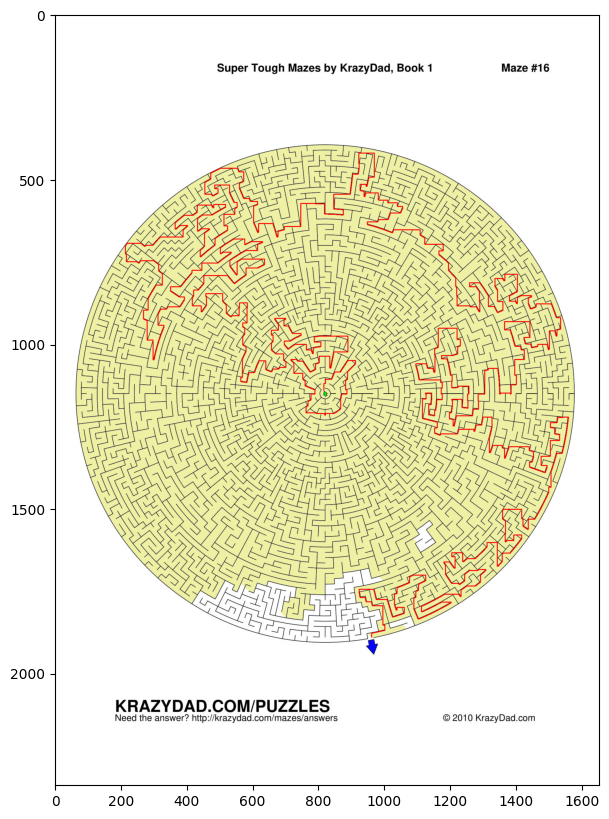

In [70]:
img = cv2.imread(file)
mark_visited(img,visited)
drawPath(img,path,2)
plt.figure(figsize=(14,10))
plt.imshow(img) # show the image on the screen 
plt.show()

